# Project Goals
In this project the perspective will be through a biodiversity analyst for the National Park Service. Where it want to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. So, as Data analist the main objectives will be to understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions to answer are:
* What is the distribution of conservation status for species?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which animal is most prevalent and what is their distribution amongst parks?

First let's take a look at the data the 'observations.csv' contains data about the parks, animal an observations of the species, meanwhile the 'species_info.csv' contains data about their conservation status and relevant information about each specie.

# Observations
* **scientific_name** - Scientific name of each species
* **park_name** - Name of the national park
* **observations** - Number of observations in the past 7 days

In [79]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Species info
* **category** - Category of taxonomy for each species
* **scientific_name** - Scientific name of each species
* **common_names** - Common names of each species
* **conservation_status** - Conservation status

In [80]:
species = pd.read_csv('species_info.csv')
#species.head()
species.category

species[5819:5900]

,category,scientific_name,common_names,conservation_status
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN
5823,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN


## Data Characteristics
Next, it would be great if we take a look at the data sizes of each data set.

In [81]:
print('Species shape: ', species.shape)
print('Observations shape: ', observations.shape)

Species shape:  (5824, 4)
Observations shape:  (23296, 3)


## Exploring data
#### Species
Now, we can start exploring the data more deeply.

In [82]:
print('Number of species: ', species.scientific_name.nunique())
print('Number of species on Observation: ', observations.scientific_name.nunique())


Number of species:  5541
Number of species on Observation:  5541


Well, the are a lot of species, we can't extract much info with that value. So, maybe we can see how many categories there are.

In [83]:
print('Number of categories: ', species.category.nunique())
print('Categories on Species: ', species.category.unique())

Number of categories:  7
Categories on Species:  ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Now, we know that there are 7 categories of species, and that we have around 5,000 species, but now, how much data we have on each category?
* Now we can see the category with the largest(**Vascular Plant**) amount of data and the one with the lowest(**Reptile**).

In [84]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

From **Observatios** data we can extract information about the conservation status of each specie.

In [85]:
print('Number of conservations status: ', species.conservation_status.nunique())
print('Name of conservations status: ', species.conservation_status.unique())
print('===========================')
print(species.groupby('conservation_status').size())
print('===========================')
print('Number of nan values: ', species.conservation_status.isna().sum())

Number of conservations status:  4
Name of conservations status:  [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
Number of nan values:  5633


In this case, we have species with nan values on Conservation status, which could be interpreted as they are not in any kind of conservation.

#### Observations
Now, extract information about the observations data.

In [86]:
print('Number of national parks: ', observations.park_name.nunique())
print('Park Names: ', observations.park_name.unique())
observations.groupby('park_name').size()

Number of national parks:  4
Park Names:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

In [87]:
print('Number of total observation: ', observations.observations.sum())

Number of total observation:  3314739


# Data Analysis
Now that we know more about the 2 data sets, we can star doing some analysis.
The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [90]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()
#species.groupby('conservation_status').size().sum()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [91]:
conservationCategory = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status','category'])['scientific_name'].count().unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


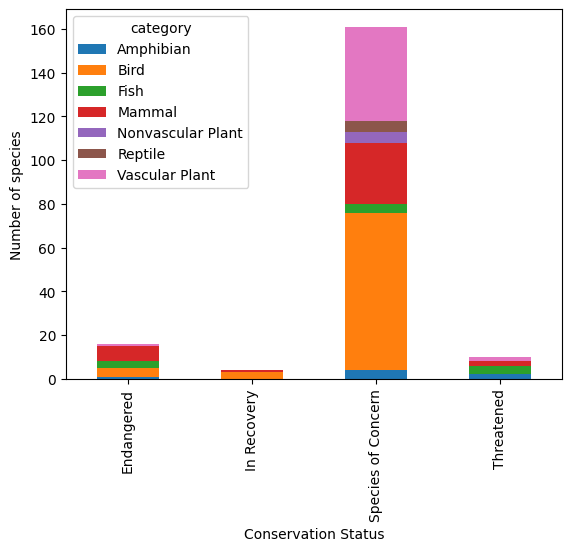

In [93]:
ax = conservationCategory.plot(kind= 'bar',stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of species');

#### In conservation
Next question would be if some types of species ara more likely to be endangered than others. For this we can create a new table group by category and from check from that category and see from that category how much species are protected.
R: From the table we can conclude that Birds, Mammals, and Vascular Plants are more likely to be protected.

In [100]:
species['is_protected'] = species.conservation_status != 'No Intervention'

category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected',
                                                                                                              index='category',
                                                                                                              values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected','protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Now, how % represent the proteced species of their category?

In [102]:
category_counts['percent_protected'] = ((category_counts.protected)*100)/(category_counts.not_protected + category_counts.protected)
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Statistical Significance
